In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

nodes             int64
epochs            int64
train-mse       float64
majority-mse    float64
minority-mse    float64
dtype: object

In [2]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

nodes epochs  train-mse                 majority-mse                  \
                        mean       std count         mean       std count   
0        1     20  14.867621  1.947895   299    15.032770  1.523842   299   
1        1     40  14.828846  1.970860   299    15.053100  1.581637   299   
2        1    100  14.804706  2.132527   299    15.044032  1.635739   299   
3        1    500  14.874261  2.089365   299    15.096861  1.536223   299   
4        1   1000  14.810392  2.001067   299    14.986411  1.612090   299   
..     ...    ...        ...       ...   ...          ...       ...   ...   
97   65536     40   0.383305  0.110828   299     0.260829  0.082548   299   
98   65536    100   0.277320  0.096060   299     0.107510  0.030947   299   
99   65536    500   0.221702  0.075272   299     0.141106  0.050767   299   
100  65536   1000   0.201669  0.067169   299     0.167724  0.062740   299   
101  65536   2000   0.180472  0.058526   299     0.188804  0.071202   299   

    minority-mse                  
            mean       std count  
0      15.286181  1.419148   299  
1      15.316724  1.702241   299  
2      15.311249  1.750857   299  
3      15.343792  1.765214   299  
4      15.391967  1.629924   299  
..           ...       ...   ...  
97      5.495980  0.411280   299  
98      5.754800  0.355829   299  
99      5.854559  0.340300   299  
100     5.895774  0.338797   299  
101     5.923410  0.339599   299  

[102 rows x 11 columns]

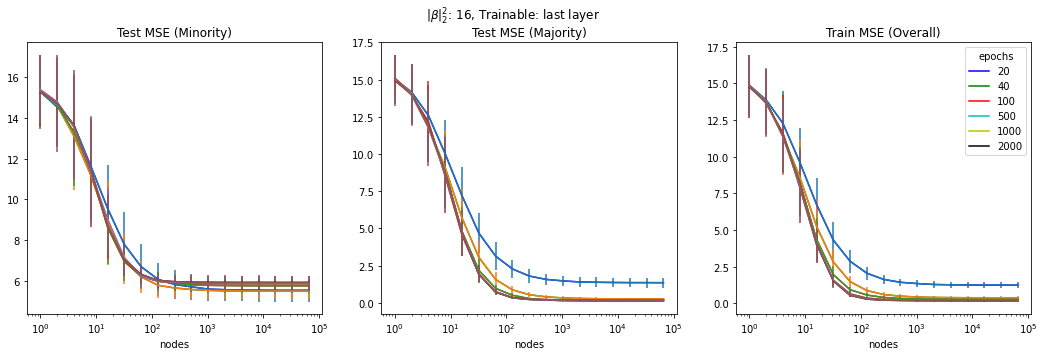

In [3]:
epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    #ax[0].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

In [4]:
epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

'html_plots/trainable_last_large_beta.html'